# 5. Generative And Discriminative Classifiers

Tutorial is based on brilliant lectures of Killian Weinberger Cornell class CS4780. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote04.html

# Maximum Likelihood Estimation (MLE)

1. Make an explicit assumption about type of distribution of target function.
2. Find the parameters of the predicted distribution

## 1. Predict type of distribution


**The binomial distribution ($n,\Theta$) can be used to model the distribution of $n$ independent binary random events that have a positive outcome with probability $\Theta$. ***


\begin{align}
P(D\mid \Theta) &= \begin{pmatrix} n_H + n_T \\  n_H  \end{pmatrix} \Theta^{n_H} (1 - \Theta)^{n_T}, 
\end{align}

and $P(D\mid \Theta)$ corresponds to the probability that we would observe exactly $n_T$ heads, $n_T$ tails, if a coin was tossed $n$ times and its probability of coming up heads is $\Theta$.

## 2. Find the parameters of the predicted distribution

\begin{align}
 \hat{\Theta}_{MLE} &= \operatorname*{argmax}_{\Theta} \,P(D; \Theta) \\
  &= \operatorname*{argmax}_{\theta} \begin{pmatrix} n_H + n_T \\ n_H \end{pmatrix} \Theta^{n_H} (1 - \Theta)^{n_T} \\
&= \operatorname*{argmax}_{\Theta} \,\log\begin{pmatrix} n_H + n_T \\ n_H \end{pmatrix} + n_H \cdot \log(\Theta) + n_T \cdot \log(1 - \Theta) \\
&= \operatorname*{argmax}_{\Theta} \, n_H \cdot \log(\Theta) + n_T \cdot \log(1 - \Theta)
\end{align}

***Solve for $\Theta$ by taking the derivative and equating it with zero*** 

            
$$ \frac{\partial}{\partial \Theta} = \frac{n_H}{\Theta} - \frac{n_T}{1-\Theta}$$
and equating it with zero
$$ \frac{n_H}{\Theta} = \frac{n_T}{1-\Theta}$$

$$ \Theta = \frac{n_T}{n_T + n_H}$$




## Interpretation

Recall that $\Theta$ is the parameters of firstly predicted type of distribution (above we predict the binomail distribution). We would like to find $\Theta$ that increase the likelihood of observing the observed data :)



Let's flip some coins and obtain$ D=\{H, T, T, H, H, H, T, T, T, T\}$.



+ We observe $n_H=4$ and $n_T=6$. 

+ Probability of getting head is $ P(H) \approx \frac{n_H}{n_H + n_T} = \frac{4}{10}= 0.4 $





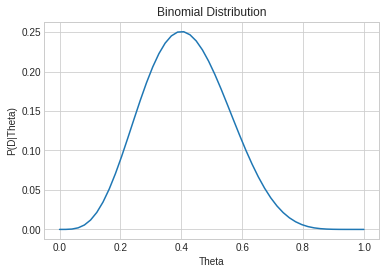

Emperical probability of observing heads 0.4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def n_choose_k(n,k):
    return np.math.factorial(n)/ (np.math.factorial(k) * np.math.factorial(n-k))
def binomial_dist(D,theta):
    n_h,n_t=sum(D),len(D)-sum(D)
    return n_choose_k(n_h+n_t,n_h) * theta**n_h *( 1- theta)**n_t

# Observed Data.
D=np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])
# Plot 'P(D|Theta), where Theta is param of binomail dist. 
plt.plot(np.linspace(0,1),[binomial_dist(D,theta=i)for i in np.linspace(0,1)])
plt.title('Binomial Distribution')
plt.ylabel('P(D|Theta)')
plt.xlabel('Theta')
plt.show()

# Emprical does indeed match.
print('Emperical probability of observing heads',D.mean())

### Frequentist $ P(D;\Theta)$  vs Bayesian $ P(D | \Theta)$ 

Bayesian thinks that $\Theta$ is **a random variable**, while Frequentit thinks that $\Theta$ is **a distribution**.


# The Bayesian Way of modelling $D$

$\Theta$ is a random variable drawn from $P(\Theta)$. 
Hence, we can specify a prior belief $P(\Theta)$.



Consider the following: We beleive that if we toss a coin 100 times, it is not likely (for us) to observe 100 heads. The bayesian way allow us to inject this brief belief.



\begin{align}
P(\theta) = \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
\end{align}


\begin{align}
P(\theta \mid D) \propto P(D \mid \theta) P(\theta) \propto \theta^{n_H + \alpha -1} (1 - \theta)^{n_T + \beta -1}
\end{align}

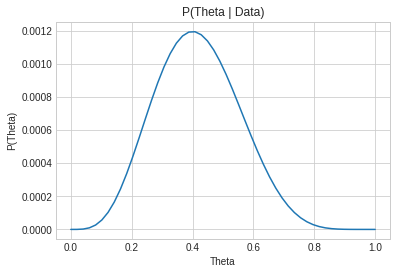

In [2]:
n_h=4
n_t=6
a,b=1,1
Q=np.linspace(0,1)

plt.plot(Q,Q**(n_h+a-1) * (1-Q)**(n_t+b-1))

plt.title('P(Theta | Data)')
plt.ylabel('P(Theta)')
plt.xlabel('Theta')
plt.show()

# Maximum a Posteriori Probability Estimation (MAP)

\begin{align}
P(\theta) = \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
\end{align}

$B(\alpha, \beta)$ is the normalization constant in the beta distributions.



\begin{align}
 \hat{\theta}_{MAP} &= \operatorname*{argmax}_{\Theta} \;P(\Theta | D) \\
&= \operatorname*{argmax}_{\Theta} \; \frac{P(D | \Theta)P(\Theta)}{P(D)} && \text{(By Bayes rule)} \\
&= \operatorname*{argmax}_{\Theta} \;\log(P(D | \Theta)) + \log(P(\Theta)) \\
&= \operatorname*{argmax}_{\Theta} \;n_H \cdot \log(\Theta) + n_T \cdot \log(1 - \Theta) + (\alpha - 1)\cdot \log(\Theta) + (\beta - 1) \cdot \log(1 - \Theta) \\
&= \operatorname*{argmax}_{\Theta} \;(n_H + \alpha - 1) \cdot \log(\Theta) + (n_T + \beta - 1) \cdot \log(1 - \Theta) \\
&\Longrightarrow  \hat{\theta}_{MAP} = \frac{n_H + \alpha - 1}{n_H + n_T + \beta + \alpha - 2}
\end{align}

# Naive Bayes Algorithm


$$
\begin{align}
h(\mathbf{x}) &= \operatorname*{argmax}_y P(y | \mathbf{x}) \\
&= \operatorname*{argmax}_y \; \frac{P(\mathbf{x} | y)P(y)}{P(\mathbf{x})} \\
&= \operatorname*{argmax}_y \; P(\mathbf{x} | y) P(y) && \text{($P(\mathbf{x})$ does not depend on $y$)} \\
&= \operatorname*{argmax}_y \; \prod_{\alpha=1}^{d} P(x_\alpha | y) P(y) && \text{(by the naive Bayes assumption)}\\
&= \operatorname*{argmax}_y \; \sum_{\alpha = 1}^{d} \log(P(x_\alpha | y)) + \log(P(y)) && \text{(as log is a monotonic function)}
\end{align}
$$

## Gaussian Naive Bayes
\begin{align}
x_\alpha \in \mathbb{R} && \text{(each feature takes on a real value)}
\end{align}

\begin{align}
P(x_\alpha \mid y=c) = \mathcal{N}\left(\mu_{\alpha c}, \sigma^{2}_{\alpha c}\right) = \frac{1}{\sqrt{2 \pi} \sigma_{\alpha c}} e^{-\frac{1}{2} \left(\frac{x_\alpha - \mu_{\alpha c}}{\sigma_{\alpha c}}\right)^2} 
\end{align}


Parameter estimation:
As always, we estimate 
the parameters of the distributions for each dimension and class are estimated independently.

\begin{align}
\mu_{\alpha c} &\leftarrow \frac{1}{n_c} \sum_{i = 1}^{n} I(y_i = c) x_{i\alpha} && \text{where $n_c = \sum_{i=1}^{n} I(y_i = c)$} \\
\sigma_{\alpha c}^2 &\leftarrow \frac{1}{n_c} \sum_{i=1}^{n} I(y_i = c)(x_{i\alpha} - \mu_{\alpha c})^2
\end{align}

Suppose $ y_i \in \{-1, +1\}$ and features are multinomial.

$$ h(\mathbf{x}) = \operatorname*{argmax}_y \; P(y) \prod_{\alpha - 1}^d P(x_\alpha \mid y) = \textrm{sign}(\mathbf{w}^\top \mathbf{x} + b)$$



$$ \mathbf{w}^\top \mathbf{x} + b > 0 \Longleftrightarrow h(\mathbf{x}) = +1. $$

$$ P(y \mid \mathbf{x}) = \frac{1}{1 + e^{-y (\mathbf{w}^\top \mathbf{x} +b) }} $$

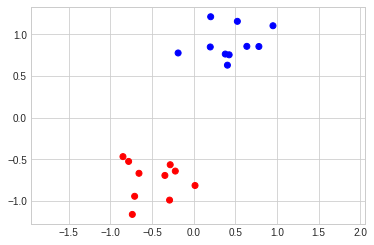

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
def sample_2D_data(mu,cov,n=10):   
    return np.random.multivariate_normal(mu, cov, n)
gaussian_mu=np.array([-0.4, -0.8])
gaussian_cov=np.array([[.1, 0], [0, .04]])
c1=sample_2D_data(-gaussian_mu,gaussian_cov)
c2=sample_2D_data(gaussian_mu,gaussian_cov)

X=np.concatenate((c1, c2), axis=0)
y=np.concatenate((np.ones(len(c1)), np.zeros(len(c2))), axis=0)

color_mapper = lambda x: 'b' if x==1 else 'r'

plt.scatter(X[:,0], X[:,1],c=[ color_mapper(i) for i in y])
plt.axis('equal')
plt.show()

In [4]:
mask = (y == 1)
mu, std = X[mask].mean(0), X[mask].std(0)

[(-2.0, 2.0), (-2.0, 2.0)]

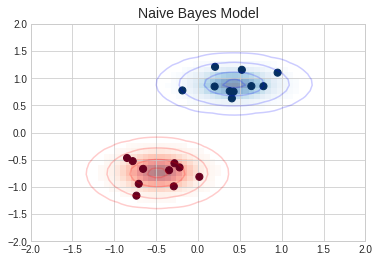

In [5]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-2, 2)
ylim = (-2, 2)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    # Compute Mean and STD of cluster
    mu, std = X[mask].mean(0), X[mask].std(0)
    # Compute probabilities
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    # ?
    Pm = np.ma.masked_array(P, P < 0.03)
    # 
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    # ?
    ax.contour(xx, yy, P.reshape(xx.shape),levels=[0.01, 0.1, 0.5, 0.9],colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

# Naive Bayes and Logistic regression



+ Generative models estimate $P(x_i,y_i)$
+ Discriminative models estimate $P(y_i | x_i)$.


The Naive Bayes algorithm models $P(x_i,y_i)$. Naive Bayes Assumption

$$ P(\mathbf{x} | y) = \prod_{\alpha = 1}^{d} P(x_\alpha | y), \text{where } x_\alpha = [\mathbf{x}]_\alpha \text{ is the value for feature } \alpha$$. This implies that feature values are independent given the label.

$$
\begin{align}
h(\mathbf{x}) &= \operatorname*{argmax}_y P(y | \mathbf{x}) \\
&= \operatorname*{argmax}_y \; \frac{P(\mathbf{x} | y)P(y)}{P(\mathbf{x})} \\
&= \operatorname*{argmax}_y \; P(\mathbf{x} | y) P(y) && \text{($P(\mathbf{x})$ does not depend on $y$)} \\
&= \operatorname*{argmax}_y \; \prod_{\alpha=1}^{d} P(x_\alpha | y) P(y) && \text{(by the naive Bayes assumption)}\\
&= \operatorname*{argmax}_y \; \sum_{\alpha = 1}^{d} \log(P(x_\alpha | y)) + \log(P(y)) && \text{(as log is a monotonic function)}
\end{align}
$$

In [6]:
def n_choose_k(n,k):
    return np.math.factorial(n)/ (np.math.factorial(k) * np.math.factorial(n-k))
def binomial_dist(D,theta):
    n_h,n_t=sum(D),len(D)-sum(D)
    return n_choose_k(n_h+n_t,n_h) * theta**n_h *( 1- theta)**n_t

 
\begin{align}
 \hat{\theta}_{MLE} &= \operatorname*{argmax}_{\theta} \,P(D; \theta) \\
  &= \operatorname*{argmax}_{\theta} \begin{pmatrix} n_H + n_T \\ n_H \end{pmatrix} \theta^{n_H} (1 - \theta)^{n_T} \\
&= \operatorname*{argmax}_{\theta} \,\log\begin{pmatrix} n_H + n_T \\ n_H \end{pmatrix} + n_H \cdot \log(\theta) + n_T \cdot \log(1 - \theta) \\
&= \operatorname*{argmax}_{\theta} \, n_H \cdot \log(\theta) + n_T \cdot \log(1 - \theta)
\end{align}

We can then solve for θ by taking the derivative and equating it with zero. This results in

\begin{align}
\frac{n_H}{\theta} = \frac{n_T}{1 - \theta} \Longrightarrow n_H - n_H\theta = n_T\theta \Longrightarrow \theta = \frac{n_H}{n_H + n_T}
\end{align}

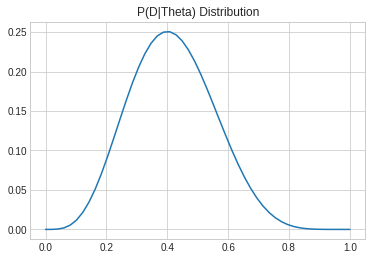

In [7]:
# Example
D=np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])
plt.plot(np.linspace(0,1),[binomial_dist(D,theta=i)for i in np.linspace(0,1)])
plt.title('P(D|Theta) Distribution')
plt.show()

In [8]:
# Emprical does indeed match.
D.mean()

0.4

# Logistic Regression

Let $Y \in {-1,1}$ and $X \in R^d$. Goal is to find $w$ so that $P(Y|X)$ is maximized on $D= {(x_i, y_i), \dots (x_n, y_n)}$, where $x_i \in X$ and $y_i \in Y$.




# Step 1
Find such w so that product of probabilities of each examples is maximum.
$$ w = argmax_w \prod_i ^n P_w(y_i | x_i; w)$$

# Step 2
Instead of computing product of probabilities, compute sum of log probabilities.
$$ w = argmax_w \, \Sigma_i ^n \, Log \, \Big( P_w(y_i | x_i; w) \Big)$$

# Step 3
Compute probability of an input via linear combination of input features 

$$ w = argmax_w \, \Sigma_i ^n \, Log \, \Big( \frac{1}{1 + exp(-z)} \Big),$$ where $z=(w^Tx) y)$. 


# Step 4

Logaritmic operation Log(1)=0.
$$ w = argmax_w \, \Sigma_i ^n \, Log \, \Big(1\Big) - Log \, \Big( 1 + exp(-z) \Big)$$

# Step 5
Take the negative sign out of summation
$$ w = argmax_w \, -  \Sigma_i ^n \, Log \, \Big( 1 + exp(-w^Tx y) \Big)$$

# Step 5
Instead of maximizing a negative of a function. Minimize the function
$$ w = argmin_w \, \Sigma_i ^n \, Log \, \Big( 1 + exp(-w^Tx y) \Big)$$


### Lets analyse $Log \, \Big( 1 + exp(-w^Tx y) \Big)$


### 1. What is $exp$ and $exp(-w^Tx y)$ ?

In [9]:
def compute_single_part_of_e(x):
    res=[]
    while x>0:
        res.append(x)
        x-=1
    if len(res)==0:
        return 1
    else:
        return 1/np.cumprod(np.array(res))[-1]
# Euler's number
print(np.exp(1))
print(sum([compute_single_part_of_e(i) for i in range(10)]))

2.718281828459045
2.7182815255731922


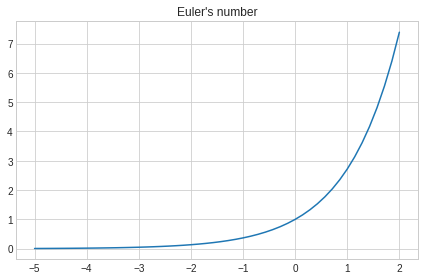

In [10]:
plt.plot(np.linspace(-5,2),np.exp(np.linspace(-5,2)))
plt.title("Euler's number")
plt.tight_layout()
plt.show()

### 2. What is $Log$ ?

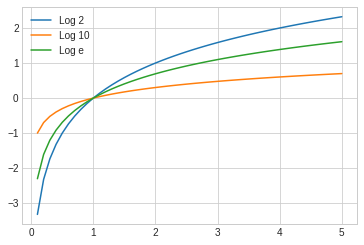

In [11]:
plt.plot(np.linspace(0.1,5),np.log2(np.linspace(0.1,5)),label='Log 2')
plt.plot(np.linspace(0.1,5),np.log10(np.linspace(0.1,5)),label='Log 10')
plt.plot(np.linspace(0.1,5),np.log(np.linspace(0.1,5)),label='Log e')
plt.legend()
plt.show()

# $w = argmin_w \, \Sigma_i ^n \, Log \, \Big( 1 + exp(-w^Tx y) \Big)$

Recall that

+ $w^T x > 0$ if they are in the same direction.

+ $w^T x = 0$ if w and x are ortogonal.

+ $w^T x < 0$ if they are in the oposite direction.

### $ (w^T x > 0)  \wedge (y=1) \rightarrow exp(- w^T x y) \approx 0$; $Log(1 + \epsilon) = 0$.

### $ (w^T x < 0)  \wedge (y=-1) \rightarrow exp(- w^T x y) \approx 0$; $Log(1 + \epsilon) = 0$.



### Loss function


$$ L_i= - \text{log} \bigg( S_{y_i} \bigg)$$ 
where $S_{y_i}$ denotes the predicted probability of the correct class $y_i$. $L_i$ is **the negative log of predicted probability of the correct class**. This intuitvely makes sense as increasing the predicted probability of true class decreases the predicted probability of other class